In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
import sys
dir_path = '/content/gdrive/MyDrive/urbcomp/Crime'
sys.path.append(dir_path)

In [3]:


import numpy as np
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 47.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import geopandas as gpd
from libpysal.weights import Queen
#from spreg import SAR
import pandas as pd
import geopandas as gpd
from pysal.model import spreg
from pysal.lib import weights
import pandas as pd

In [9]:
file_path = '/content/gdrive/MyDrive/urbcomp/Crime/geo_export_182bea76-84a6-44bd-9d8a-520f277f132b.shp'

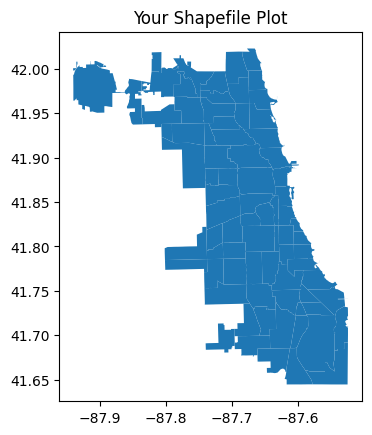

In [10]:
gdf = gpd.read_file(file_path)

# Plot the shapefile
gdf.plot()
plt.title('Your Shapefile Plot')
plt.show()

In [8]:
#gdf.head()

In [9]:
drop_cols = ['perimeter' , 'area' , 'comarea' , 'comarea_id']
gdf.drop(columns=drop_cols, inplace=True)


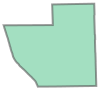

In [10]:
(gdf['geometry'][5])

In [11]:
#(float(gdf['area_num_1'][0]))
gdf['area_num_1'] = gdf['area_num_1'].astype(float)

In [12]:
crime_data_main = pd.read_csv('/content/gdrive/MyDrive/urbcomp/Crime/Crimes_-_2001_to_Present-2.csv')  # Assuming crime data is in a CSV file


In [98]:
crime_data = crime_data_main

crime_data = crime_data.dropna()
# Convert the crime data to a GeoDataFrame
geometry = gpd.points_from_xy(crime_data['Longitude'], crime_data['Latitude'])
gdf_crime = gpd.GeoDataFrame(crime_data, geometry=geometry)



In [99]:
crime_data['Year'] = pd.to_datetime(crime_data['Year'], format='%Y')

# Create a mask to select crime data after the year 2018
after_2018_mask = crime_data['Year'] > '2017-12-31'

# Select crime data after the year 2018
crime_after_2018 = crime_data[after_2018_mask]

# Optionally, you can reset the index for the new dataset
crime_data = crime_after_2018.reset_index(drop=True)

# Display basic information about the new dataset
print("Crime dataset after the year 2018:" , len(crime_data))


<ipython-input-99-d4893546182e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['Year'] = pd.to_datetime(crime_data['Year'], format='%Y')


Crime dataset after the year 2018: 1365919


In [100]:
crime_data_sorted = crime_data.sort_values(by='Year').reset_index(drop=True)
print(crime_data_sorted.head())

         ID Case Number                    Date                 Block  IUCR  \
0  13054549    JG238284  07/08/2018 12:00:00 AM   028XX S KEDVALE AVE  1752   
1  11450325    JB438467  09/16/2018 08:14:00 PM       014XX E 75TH ST  0620   
2  11470426    JB467243  10/01/2018 09:00:00 AM   030XX S KILDARE AVE  1152   
3  11496185    JB500881  11/02/2018 03:03:00 PM  006XX N FAIRBANKS CT  2024   
4  11509652    JB519013  11/16/2018 12:01:00 AM     056XX S BISHOP ST  0610   

                 Primary Type  \
0  OFFENSE INVOLVING CHILDREN   
1                    BURGLARY   
2          DECEPTIVE PRACTICE   
3                   NARCOTICS   
4                    BURGLARY   

                                         Description Location Description  \
0  AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER            RESIDENCE   
1                                     UNLAWFUL ENTRY            APARTMENT   
2                              ILLEGAL USE CASH CARD                OTHER   
3                 

In [94]:
len(crime_data)

1365919

In [101]:
crime_data['Year'] = pd.to_datetime(crime_data['Year'], format='%Y')

# List of years you are interested in
years_of_interest = [2018, 2019, 2020, 2021, 2022]

# Create masks for each year
year_masks = [crime_data['Year'].dt.year == year for year in years_of_interest]

# Save crime data for each year in CSV
for year, year_mask in zip(years_of_interest, year_masks):
    crime_for_year = crime_data[year_mask].reset_index(drop=True)
    print(f"Crime dataset for {year}:", len(crime_for_year))
    crime_for_year.to_csv(f'/content/gdrive/MyDrive/urbcomp/Crime/datasets/crime_{year}.csv', index=False)

Crime dataset for 2018: 262902
Crime dataset for 2019: 258169
Crime dataset for 2020: 206921
Crime dataset for 2021: 202026
Crime dataset for 2022: 232464


In [102]:

crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Create a mask for morning (6 am to 6 pm) and night (6 pm to 6 am)
morning_mask = (crime_data['Date'].dt.hour >= 6) & (crime_data['Date'].dt.hour < 18)
night_mask = ~morning_mask  # Inverse of the morning mask

# Create two separate datasets for morning and night
crime_morning = crime_data[morning_mask]
crime_night = crime_data[night_mask]

# Optionally, you can reset the index for the new datasets
crime_morning = crime_morning.reset_index(drop=True)
crime_night = crime_night.reset_index(drop=True)

# Display basic information about the new datasets
print("Crime dataset for Morning (6 am to 6 pm):" , len(crime_morning))
print("\nCrime dataset for Night (6 pm to 6 am):" ,  len(crime_night))



Crime dataset for Morning (6 am to 6 pm): 715865

Crime dataset for Night (6 pm to 6 am): 650054


In [103]:
crime_morning.to_csv('/content/gdrive/MyDrive/urbcomp/Crime/datasets/crime_morning.csv', index=False)
crime_night.to_csv('/content/gdrive/MyDrive/urbcomp/Crime/datasets/crime_night.csv', index=False)


In [104]:
# crime_data.to_csv('/content/gdrive/MyDrive/urbcomp/Crime/datasets/crime_data.csv', index=False)


In [11]:
crime_data = pd.read_csv('/content/gdrive/MyDrive/urbcomp/Crime/datasets/crime_data.csv')


In [12]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3.0,35.0,06,1178180.0,1881621.0,2020-01-01,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
1,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11.0,60.0,08B,1173292.0,1883705.0,2020-01-01,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
2,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7.0,46.0,04A,1198234.0,1851595.0,2020-01-01,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
3,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,15.0,67.0,08B,1164812.0,1861251.0,2020-01-01,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)"
4,12126129,JD321064,2020-08-04 20:28:00,081XX S LOOMIS BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,21.0,71.0,15,1168412.0,1850836.0,2020-01-01,08/11/2020 03:42:53 PM,41.746221,-87.658477,"(41.746220584, -87.658477307)"


In [13]:
# crime_data['Primary Type'].value_counts()

In [14]:
# crime_data = crime_night

In [15]:
# crime_narcotics = crime_data[crime_data['Primary Type'] == 'NARCOTICS']
# crime_weapons_violation = crime_data[crime_data['Primary Type'] == 'WEAPONS VIOLATION']
# crime_theft = crime_data[crime_data['Primary Type'] == 'CRIMINAL DAMAGE']
# crime_mvt = crime_data[crime_data['Primary Type'] == 'MOTOR VEHICLE THEFT']
# crime_robbery = crime_data[crime_data['Primary Type'] == 'ROBBERY']
# crime_hamicide = crime_data[crime_data['Primary Type'] == 'HOMICIDE']
# crime_prostitution = crime_data[crime_data['Primary Type'] == 'PROSTITUTION']

In [16]:
#crime_night , crime_morning

In [17]:
#crime_df.head()

In [18]:
len(crime_data)

1365919

In [19]:
#crime_data = crime_df

In [20]:
# # Plot the shapefile
# ax = gdf.plot(color='lightgrey', edgecolor='black')

# # Plot the crime data on top of the shapefile
# gdf_crime.plot(ax=ax, color='red', markersize=1, alpha=0.5)

# plt.title('Crime in Chicago')
# plt.show()

In [21]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:
#output_path = '/content/gdrive/MyDrive/urbcomp/Crime/datasets/crime_morning.csv'

In [23]:
# coordinates = crime_data[['Latitude', 'Longitude']].values

# # Standardize the coordinates (optional but often recommended)
# scaler = StandardScaler()
# coordinates_scaled = scaler.fit_transform(coordinates)

# # Perform DBSCAN clustering
# eps = 0.05  # Adjust the epsilon (distance threshold) based on your data
# min_samples = 75  # Adjust the minimum number of samples required to form a dense region
# dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# clusters = dbscan.fit_predict(coordinates_scaled)

# # Add the cluster labels to the crime DataFrame
# crime_data['Cluster'] = clusters

# # Convert the DataFrame to a GeoDataFrame
# geometry = gpd.points_from_xy(crime_data['Longitude'], crime_data['Latitude'])
# gdf1 = gpd.GeoDataFrame(crime_data, geometry=geometry)

# # Plot the clusters (optional)
# fig, ax = plt.subplots(figsize=(10, 10))
# gdf1.plot(column='Cluster', cmap='viridis', legend=True, ax=ax, markersize=5)
# plt.title('DBSCAN Clustering of Crime Data')
# #plt.savefig(output_path)
# plt.show()

In [24]:
income_data = pd.read_csv('/content/gdrive/MyDrive/urbcomp/Crime/Per_Capita_Income.csv')
income_data = income_data.dropna()
income_data.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [25]:
population_data = pd.read_csv('/content/gdrive/MyDrive/urbcomp/Crime/chicago_population_density.csv')
population_data.head()

,community_Area,community_name,population_2020,area_sqml,area_sqkm,density_sqml,density_sqkm
0,1,Rogers Park,"55,628",1.84,4.77,"30,232.61","11,672.81"
1,2,West Ridge,"77,122",3.53,9.14,"21,847.59","8,435.36"
2,3,Uptown,"57,182",2.32,6.01,"24,647.41","9,516.37"
3,4,Lincoln Square,"40,494",2.56,6.63,"15,817.97","6,107.32"
4,5,North Center,"35,114",2.05,5.31,"17,128.78","6,613.42"


In [26]:
print(len(income_data))
print(len(population_data))

77
77


In [27]:
# Assuming population_data is your DataFrame
population_data['population_2020'] = population_data['population_2020'].str.replace(',', '').astype(float)
population_data['density_sqml'] = population_data['density_sqml'].str.replace(',', '').astype(float)
population_data['density_sqkm'] = population_data['density_sqkm'].str.replace(',', '').astype(float)

# Convert other columns to float
population_data['area_sqml'] = population_data['area_sqml'].astype(float)
population_data['area_sqkm'] = population_data['area_sqkm'].astype(float)

print(population_data.dtypes)

community_Area       int64
community_name      object
population_2020    float64
area_sqml          float64
area_sqkm          float64
density_sqml       float64
density_sqkm       float64
dtype: object


In [28]:
merge_df = pd.merge(population_data, income_data, left_on='community_Area', right_on='Community Area Number', how='inner')

In [29]:
merge_df.head()

,community_Area,community_name,population_2020,area_sqml,area_sqkm,density_sqml,density_sqkm,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,55628.0,1.84,4.77,30232.61,11672.81,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2,West Ridge,77122.0,3.53,9.14,21847.59,8435.36,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3,Uptown,57182.0,2.32,6.01,24647.41,9516.37,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4,Lincoln Square,40494.0,2.56,6.63,15817.97,6107.32,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5,North Center,35114.0,2.05,5.31,17128.78,6613.42,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [30]:
gdf['area_num_1'] = gdf['area_num_1'].astype(int)


In [31]:
type(gdf['area_num_1'][0])

numpy.int64

In [32]:
gdf.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [33]:
result_df = gpd.GeoDataFrame(pd.merge(gdf, merge_df, left_on='area_num_1', right_on='Community Area Number'))
#result_df = gpd.GeoDataFrame(pd.merge(gdf, income_data, left_on='Community Area', right_on='Community Area Number'))

# #result_df.drop(columns=['community', 'area_numbe', 'area_num_1'] , inplace=True)
# result_df.head()

In [34]:
result_df.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,...,density_sqkm,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,4748.09,35.0,Douglas,1.8,29.6,18.2,14.3,30.7,23791,47.0
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",...,4526.02,36.0,Oakland,1.3,39.7,28.7,18.4,40.4,19252,78.0
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",...,1395.94,37.0,Fuller Park,3.2,51.2,33.9,26.6,44.9,10432,97.0
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",...,5456.21,38.0,Grand Boulevard,3.3,29.3,24.3,15.9,39.5,23472,57.0
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",...,7096.82,39.0,Kenwood,2.4,21.7,15.7,11.3,35.4,35911,26.0


In [35]:
type(result_df)

geopandas.geodataframe.GeoDataFrame

In [36]:
# output_geojson_path = '/content/gdrive/MyDrive/urbcomp/Crime/datasets/merged_data.geojson'

# result_df.to_file(output_geojson_path, driver='GeoJSON')

In [38]:
#result_df = pd.merge(population_data, result_df, left_on='community_Area', right_on='area_num_1', how='inner')

In [39]:
result_df.head()

,area_num_1,area_numbe,community,shape_area,shape_len,geometry,community_Area,community_name,population_2020,area_sqml,...,density_sqkm,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,35,35,DOUGLAS,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",35,Douglas,20291.0,1.65,...,4748.09,35.0,Douglas,1.8,29.6,18.2,14.3,30.7,23791,47.0
1,36,36,OAKLAND,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",36,Oakland,6799.0,0.58,...,4526.02,36.0,Oakland,1.3,39.7,28.7,18.4,40.4,19252,78.0
2,37,37,FULLER PARK,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",37,Fuller Park,2567.0,0.71,...,1395.94,37.0,Fuller Park,3.2,51.2,33.9,26.6,44.9,10432,97.0
3,38,38,GRAND BOULEVARD,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",38,Grand Boulevard,24589.0,1.74,...,5456.21,38.0,Grand Boulevard,3.3,29.3,24.3,15.9,39.5,23472,57.0
4,39,39,KENWOOD,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",39,Kenwood,19116.0,1.04,...,7096.82,39.0,Kenwood,2.4,21.7,15.7,11.3,35.4,35911,26.0


In [40]:
result_df.columns

Index(['area_num_1', 'area_numbe', 'community', 'shape_area', 'shape_len',
       'geometry', 'community_Area', 'community_name', 'population_2020',
       'area_sqml', 'area_sqkm', 'density_sqml', 'density_sqkm',
       'Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [41]:
len(result_df)

77

In [42]:
from matplotlib.colors import LinearSegmentedColormap

In [43]:
colors_r = [(1, 0.8, 0.8), (1, 0, 0)]  # White to red
colors_b = [(0.8, 0.8, 0.8), (0.1, 0.1, 0.1)]  # White to black
colors_g = [(0.8, 1, 0.8), (0, 0.5, 0)]  # White to green
cmap_name_b = 'white_to_black'
cmap_name_r = 'white_to_red'
cmap_name_g = 'white_to_green'
white_to_black_cmap = LinearSegmentedColormap.from_list(cmap_name_b, colors_b, N=256)
white_to_red_cmap = LinearSegmentedColormap.from_list(cmap_name_r, colors_r, N=256)
white_to_green_cmap = LinearSegmentedColormap.from_list(cmap_name_g, colors_g, N=256)


In [44]:
output_path = '/content/gdrive/MyDrive/urbcomp/Crime/images/Per_Capita_Income.png'

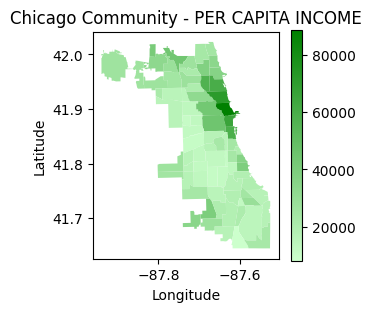

In [45]:
ax = result_df.plot(column='PER CAPITA INCOME ', cmap=white_to_green_cmap, legend=True, figsize=(3, 3))

# Add labels and title
plt.title('Chicago Community - PER CAPITA INCOME')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

In [46]:
output_path = '/content/gdrive/MyDrive/urbcomp/Crime/images/Hardship.png'

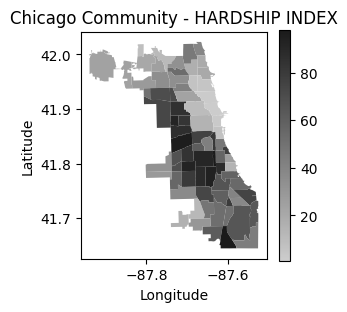

In [47]:
ax = result_df.plot(column='HARDSHIP INDEX', cmap=white_to_black_cmap, legend=True, figsize=(3, 3))

# Add labels and title
plt.title('Chicago Community - HARDSHIP INDEX')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

In [48]:
result_df['PERCENT OF HOUSING CROWDED'].sum()

379.1000000000001

In [49]:
output_path = '/content/gdrive/MyDrive/urbcomp/Crime/images/Housing.png'

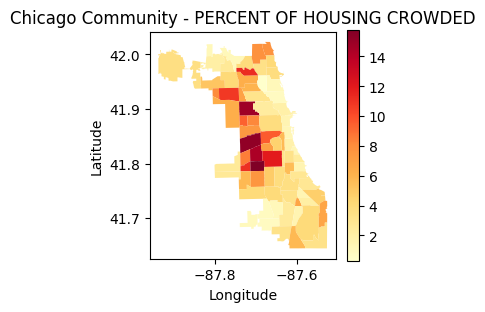

In [50]:
ax = result_df.plot(column='PERCENT OF HOUSING CROWDED', cmap='YlOrRd', legend=True, figsize=(3, 3))

# Add labels and title
plt.title('Chicago Community - PERCENT OF HOUSING CROWDED')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

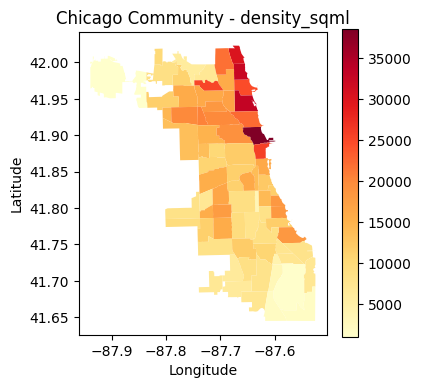

In [51]:
ax = result_df.plot(column='density_sqml', cmap='YlOrRd', legend=True, figsize=(4, 4))

# Add labels and title
plt.title('Chicago Community - density_sqml')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

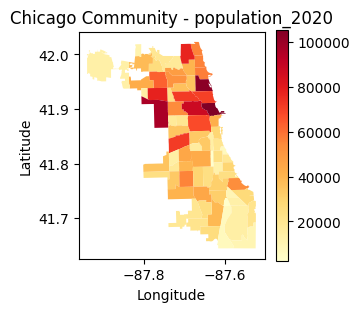

In [52]:
ax = result_df.plot(column='population_2020', cmap='YlOrRd', legend=True, figsize=(3, 3))

# Add labels and title
plt.title('Chicago Community - population_2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

In [53]:
crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [54]:
crime_data['counts'] = crime_data.groupby('Community Area').size()

In [55]:
crime_counts = crime_data[['Community Area','counts']]

In [56]:
crime_counts['Community Area'].value_counts()

23.0    4623
29.0    3936
26.0    3829
25.0    3077
27.0    1712
        ... 
57.0      35
36.0      24
55.0      17
12.0      15
9.0        4
Name: Community Area, Length: 77, dtype: int64

In [57]:
# Group by 'Community Area' and calculate the count for each group
df = crime_data.groupby('Community Area').size().reset_index(name='Count')
df.head()

,Community Area,Count
0,1.0,305
1,2.0,211
2,3.0,184
3,4.0,89
4,5.0,38


In [58]:
len(df)

77

In [59]:
crime_df = gpd.GeoDataFrame(pd.merge(df , result_df, left_on='Community Area' , right_on='Community Area Number', ))
#crime_df.drop(columns=['community', 'area_numbe', 'area_num_1'] , inplace=True)
crime_df.head()

,Community Area,Count,area_num_1,area_numbe,community,shape_area,shape_len,geometry,community_Area,community_name,...,density_sqkm,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,305,1,1,ROGERS PARK,5.125990e+07,34052.397576,"POLYGON ((-87.65456 41.99817, -87.65574 41.998...",1,Rogers Park,...,11672.81,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,211,2,2,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((-87.68465 42.01948, -87.68464 42.019...",2,West Ridge,...,8435.36,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,184,3,3,UPTOWN,6.509564e+07,46972.794555,"POLYGON ((-87.64102 41.95480, -87.64400 41.954...",3,Uptown,...,9516.37,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,89,4,4,LINCOLN SQUARE,7.135233e+07,36624.603085,"POLYGON ((-87.67441 41.97610, -87.67440 41.976...",4,Lincoln Square,...,6107.32,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,38,5,5,NORTH CENTER,5.705417e+07,31391.669754,"POLYGON ((-87.67336 41.93234, -87.67342 41.932...",5,North Center,...,6613.42,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [60]:
crime_df['Count_per_population'] = crime_df['Count'] / crime_df['population_2020']
crime_df['Count_per_density'] = crime_df['Count'] / crime_df['density_sqml']


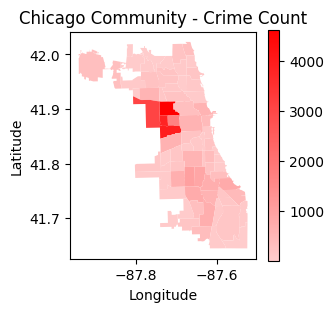

In [61]:
ax = crime_df.plot(column='Count', cmap=white_to_red_cmap, legend=True, figsize=(3, 3))

# Add labels and title
plt.title('Chicago Community - Crime Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

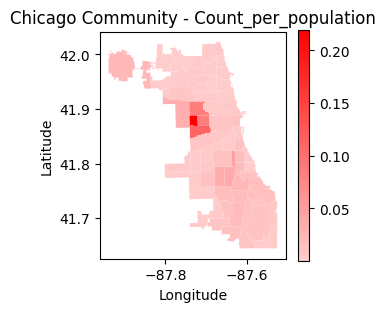

In [62]:
ax = crime_df.plot(column='Count_per_population', cmap=white_to_red_cmap, legend=True, figsize=(3, 3))

# Add labels and title
plt.title('Chicago Community - Count_per_population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

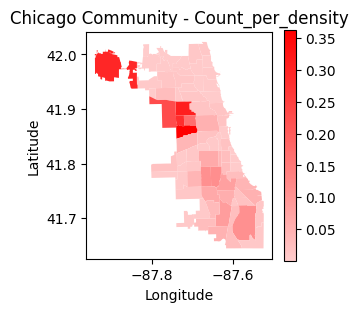

In [63]:
ax = crime_df.plot(column='Count_per_density', cmap=white_to_red_cmap, legend=True, figsize=(3, 3))

# Add labels and title
plt.title('Chicago Community - Count_per_density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(output_path)
# Show the plot
plt.show()

In [64]:
crime_df.columns

Index(['Community Area', 'Count', 'area_num_1', 'area_numbe', 'community',
       'shape_area', 'shape_len', 'geometry', 'community_Area',
       'community_name', 'population_2020', 'area_sqml', 'area_sqkm',
       'density_sqml', 'density_sqkm', 'Community Area Number',
       'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Count_per_population', 'Count_per_density'],
      dtype='object')

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_cov_corr_matrix(dataframe, selected_columns):
    selected_data = dataframe[selected_columns]
    covariance_matrix = selected_data.cov()
    correlation_matrix = selected_data.corr()
    return covariance_matrix, correlation_matrix

def plot_matrices(covariance_matrix, correlation_matrix):
    # Plot the covariance matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title("Covariance Matrix")
    plt.show()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title("Correlation Matrix")
    plt.show()


selected_columns = [ 'Count', 'population_2020',
       'density_sqml',  'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX']

# covariance_matrix, correlation_matrix = calculate_cov_corr_matrix(crime_df, selected_columns)
# plot_matrices(covariance_matrix, correlation_matrix)


In [66]:

import geopandas as gpd
from pysal.explore import esda
from pysal.lib import weights
import pandas as pd
# Load your GeoDataFrame with spatial data
# Replace 'your_data.shp' with the actual file name or path
gdf = crime_df

# Define the variables for which you want to calculate spatial correlation
variables = [ 'Count', 'population_2020',
       'density_sqml',  'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX']

# Create a spatial weights matrix (W)
w = weights.Queen.from_dataframe(gdf)

# Create a dictionary to store local Moran's I values for each variable
moran_dict = {}

# Calculate local Moran's I for each variable
for variable in variables:
    moran_loc = esda.moran.Moran_Local(gdf[variable], w)
    moran_dict[variable] = moran_loc.Is

# Create a DataFrame from the dictionary
moran_df = pd.DataFrame(moran_dict)
print(moran_df)

# # # Display the spatial correlation matrix
# # print("Spatial Correlation Matrix:")
# # print(moran_df.corr())
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'moran_df' contains the spatial correlation matrix
# # Replace it with the actual variable containing your matrix
# correlation_matrix = moran_df.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# plt.title("Spatial Correlation Matrix Heatmap")
# plt.show()

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
<ipython-input-66-15ffcf3a0549>:18: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(gdf)


       Count  population_2020  density_sqml  PERCENT OF HOUSING CROWDED  \
0   0.056639         1.105404      4.263520                    0.210161   
1   0.099527         0.504891      1.261739                   -0.031468   
2   0.128032         0.885534      2.341503                    0.223486   
3   0.148030         0.173638      0.415808                    0.011049   
4   0.160119        -0.023958      0.611032                    0.148575   
..       ...              ...           ...                         ...   
72  0.006205         0.083994      0.412258                    0.809959   
73  0.179855         0.457833      0.795042                    1.178251   
74  0.057994         0.256786      0.714973                    0.961672   
75  0.076307        -0.200755      0.679463                    0.129119   
76  0.122940         0.807406      3.423657                   -0.045627   

    PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED  \
0                          -0.

In [67]:
column_dtypes = crime_df.dtypes

# Display the result
print(column_dtypes)

Community Area                                   float64
Count                                              int64
area_num_1                                         int64
area_numbe                                        object
community                                         object
shape_area                                       float64
shape_len                                        float64
geometry                                        geometry
community_Area                                     int64
community_name                                    object
population_2020                                  float64
area_sqml                                        float64
area_sqkm                                        float64
density_sqml                                     float64
density_sqkm                                     float64
Community Area Number                            float64
COMMUNITY AREA NAME                               object
PERCENT OF HOUSING CROWDED     

In [68]:
crime_df.head()

,Community Area,Count,area_num_1,area_numbe,community,shape_area,shape_len,geometry,community_Area,community_name,...,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Count_per_population,Count_per_density
0,1.0,305,1,1,ROGERS PARK,5.125990e+07,34052.397576,"POLYGON ((-87.65456 41.99817, -87.65574 41.998...",1,Rogers Park,...,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,0.005483,0.010088
1,2.0,211,2,2,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((-87.68465 42.01948, -87.68464 42.019...",2,West Ridge,...,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,0.002736,0.009658
2,3.0,184,3,3,UPTOWN,6.509564e+07,46972.794555,"POLYGON ((-87.64102 41.95480, -87.64400 41.954...",3,Uptown,...,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,0.003218,0.007465
3,4.0,89,4,4,LINCOLN SQUARE,7.135233e+07,36624.603085,"POLYGON ((-87.67441 41.97610, -87.67440 41.976...",4,Lincoln Square,...,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,0.002198,0.005627
4,5.0,38,5,5,NORTH CENTER,5.705417e+07,31391.669754,"POLYGON ((-87.67336 41.93234, -87.67342 41.932...",5,North Center,...,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,0.001082,0.002218


In [69]:
import geopandas as gpd
import pandas as pd
from libpysal.weights import Queen , lag_spatial , Rook
from esda.moran import Moran
from spreg import OLS

In [70]:
merged_data = crime_df

# Create spatial weights matrix (Queen contiguity)
w = Queen.from_dataframe(merged_data)
# Explore spatial autocorrelation using Moran's I

<ipython-input-70-6567d29ab258>:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_data)


In [71]:
import geopandas as gpd
from libpysal.weights import Queen, Rook
from esda.moran import Moran
import pandas as pd
from spreg import OLS, ml_error

# Assuming 'merged_data' is your DataFrame and 'Count' is one of its columns
gdf = merged_data

# List of weight types
weight_types = ['rook', 'queen']

# List of columns for which you want to calculate Moran's I
cols = ['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
        'PERCENT AGED 16+ UNEMPLOYED',
        'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
        'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
        'HARDSHIP INDEX', 'Count' , 'Count_per_population' , 'Count_per_density']

for weight_type in weight_types:
    if weight_type == 'rook':
        w = Rook.from_dataframe(gdf)
    elif weight_type == 'queen':
        w = Queen.from_dataframe(gdf)
    elif weight_type == 'knn':
        # Replace k with the desired number of neighbors
        w = KNN.from_dataframe(gdf, k=6)

    for col in cols:
        y = gdf[col].values
        moran = Moran(y, w)
        print(f"Moran's I for {col} with {weight_type} weights: {moran.I}")


<ipython-input-71-aedb35bd56d8>:22: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(gdf)


Moran's I for PERCENT OF HOUSING CROWDED with rook weights: 0.4700722011715262
Moran's I for PERCENT HOUSEHOLDS BELOW POVERTY with rook weights: 0.49679803562099484
Moran's I for PERCENT AGED 16+ UNEMPLOYED with rook weights: 0.5795217657599349
Moran's I for PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA with rook weights: 0.5567855369080674
Moran's I for PERCENT AGED UNDER 18 OR OVER 64 with rook weights: 0.6374490732482847
Moran's I for PER CAPITA INCOME  with rook weights: 0.61740639155665
Moran's I for HARDSHIP INDEX with rook weights: 0.5638269696012362
Moran's I for Count with rook weights: 0.5405450664871873
Moran's I for Count_per_population with rook weights: 0.4400491646279276
Moran's I for Count_per_density with rook weights: 0.4029590395542166


<ipython-input-71-aedb35bd56d8>:24: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


Moran's I for PERCENT OF HOUSING CROWDED with queen weights: 0.4523760005699803
Moran's I for PERCENT HOUSEHOLDS BELOW POVERTY with queen weights: 0.4806607505248818
Moran's I for PERCENT AGED 16+ UNEMPLOYED with queen weights: 0.5648148849133808
Moran's I for PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA with queen weights: 0.53779080969538
Moran's I for PERCENT AGED UNDER 18 OR OVER 64 with queen weights: 0.6224064852814762
Moran's I for PER CAPITA INCOME  with queen weights: 0.5880586249032317
Moran's I for HARDSHIP INDEX with queen weights: 0.5387053441413704
Moran's I for Count with queen weights: 0.5104757891559478
Moran's I for Count_per_population with queen weights: 0.4285311072346698
Moran's I for Count_per_density with queen weights: 0.3785107834950677


In [72]:


# merged_data['lag_crime'] = lag_spatial(w , y)
# y = merged_data['Count'].values
# X_cols = ['lag_crime', 'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
#       'PERCENT AGED 16+ UNEMPLOYED',
#       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
#       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
#       'HARDSHIP INDEX']
# X = merged_data[X_cols].values
# #ols_model = OLS(y, X, w=w, name_y='Count', name_x=X_cols)
# sar_model = SAR(y, X, w=w, name_y='Count', name_x=X_cols)

# # Fit the SAR model
# results = sar_model.fit()

# # Display regression results, including the p-value for the spatial lag coefficient (rho)
# print(results.summary)
# #print(ols_model.summary)


In [73]:
gdf = merged_data
target = ['Count', 'Count_per_population', 'Count_per_density']
weight_types = [ 'rook']#'queen',

for target_variable in target:
    y = gdf[target_variable].values

    for weight_type in weight_types:
        if weight_type == 'queen':
            w = Queen.from_dataframe(gdf)
        elif weight_type == 'rook':
            w = Rook.from_dataframe(gdf)

        lagged_variable_name = f'lag_{target_variable}_{weight_type}'
        gdf[lagged_variable_name] = lag_spatial(w, y)

        y = gdf[target_variable].values

        X_cols = [lagged_variable_name, 'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
                  'PERCENT AGED 16+ UNEMPLOYED',
                  'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
                  'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
                  'HARDSHIP INDEX']
        X = gdf[X_cols].values

        ols_model = OLS(y, X, w=w, name_y=target_variable, name_x=X_cols)
        print('Target Variable :', target_variable)
        print(ols_model.summary)


<ipython-input-73-22813c84c994>:12: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(gdf)


Target Variable : Count
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       Count                Number of Observations:          77
Mean dependent var  :    444.9740                Number of Variables   :           9
S.D. dependent var  :    864.5880                Degrees of Freedom    :          68
R-squared           :      0.7066
Adjusted R-squared  :      0.6720
Sum squared residual:   1.667e+07                F-statistic           :     20.4677
Sigma-square        :  245147.483                Prob(F-statistic)     :   2.231e-15
S.E. of regression  :     495.124                Log likelihood        :    -582.243
Sigma-square ML     :  216493.881                Akaike info criterion :    1182.486
S.E of regression ML:    465.2890                Schwarz criterion     :    1203.580

------------------------------------

<ipython-input-73-22813c84c994>:12: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(gdf)


Target Variable : Count_per_population
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Count_per_population                Number of Observations:          77
Mean dependent var  :      0.0147                Number of Variables   :           9
S.D. dependent var  :      0.0306                Degrees of Freedom    :          68
R-squared           :      0.5894
Adjusted R-squared  :      0.5411
Sum squared residual:   0.0291237                F-statistic           :     12.2024
Sigma-square        :       0.000                Prob(F-statistic)     :   1.212e-10
S.E. of regression  :       0.021                Log likelihood        :     194.122
Sigma-square ML     :       0.000                Akaike info criterion :    -370.244
S.E of regression ML:      0.0194                Schwarz criterion     :    -349.150

-------------

<ipython-input-73-22813c84c994>:12: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(gdf)


Target Variable : Count_per_density
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Count_per_density                Number of Observations:          77
Mean dependent var  :      0.0419                Number of Variables   :           9
S.D. dependent var  :      0.0744                Degrees of Freedom    :          68
R-squared           :      0.5461
Adjusted R-squared  :      0.4927
Sum squared residual:    0.190753                F-statistic           :     10.2269
Sigma-square        :       0.003                Prob(F-statistic)     :    2.95e-09
S.E. of regression  :       0.053                Log likelihood        :     121.764
Sigma-square ML     :       0.002                Akaike info criterion :    -225.528
S.E of regression ML:      0.0498                Schwarz criterion     :    -204.434

-------------------

In [74]:
# merged_data['lag_crime'] = lag_spatial(w , y)

# # Specify the dependent and independent variables for the spatial autoregressive model
# y = merged_data['Count'].values
# X_cols = ['lag_crime', 'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
#        'PERCENT AGED 16+ UNEMPLOYED',
#        'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
#        'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
#        'HARDSHIP INDEX']
# X = merged_data[X_cols].values

In [75]:
# ols_model = OLS(y, X, w=w, name_y='Count', name_x=X_cols)
# print(ols_model.summary)


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

target = ['Count', 'Count_per_population', 'Count_per_density']
weight_types = ['rook']  # 'queen',

for target_variable in target:
    y = gdf[target_variable].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for weight_type in weight_types:
        if weight_type == 'queen':
            w = Queen.from_dataframe(gdf)
        elif weight_type == 'rook':
            w = Rook.from_dataframe(gdf)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        r2 = r2_score(y_test, predictions)
        print(f'R-squared: {r2}')

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        importances = model.feature_importances_
        feature_names = X_cols

        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })

        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print("Target variable :" , target_variable)
        print("Feature Importances:")
        print(feature_importance_df)


<ipython-input-76-f9e29778bdcc>:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(gdf)


R-squared: 0.7420386705062034
Target variable : Count
Feature Importances:
                                        Feature  Importance
0                    lag_Count_per_density_rook    0.870691
4  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0.031087
2              PERCENT HOUSEHOLDS BELOW POVERTY    0.026305
3                   PERCENT AGED 16+ UNEMPLOYED    0.024100
7                                HARDSHIP INDEX    0.016953
5              PERCENT AGED UNDER 18 OR OVER 64    0.016724
6                            PER CAPITA INCOME     0.008390
1                    PERCENT OF HOUSING CROWDED    0.005748


<ipython-input-76-f9e29778bdcc>:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(gdf)


R-squared: 0.26582033500943303
Target variable : Count_per_population
Feature Importances:
                                        Feature  Importance
0                    lag_Count_per_density_rook    0.705578
2              PERCENT HOUSEHOLDS BELOW POVERTY    0.094056
3                   PERCENT AGED 16+ UNEMPLOYED    0.083711
6                            PER CAPITA INCOME     0.039942
7                                HARDSHIP INDEX    0.037337
5              PERCENT AGED UNDER 18 OR OVER 64    0.017945
1                    PERCENT OF HOUSING CROWDED    0.012562
4  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0.008868


<ipython-input-76-f9e29778bdcc>:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(gdf)


R-squared: 0.49334256780263586
Target variable : Count_per_density
Feature Importances:
                                        Feature  Importance
0                    lag_Count_per_density_rook    0.796915
3                   PERCENT AGED 16+ UNEMPLOYED    0.043736
2              PERCENT HOUSEHOLDS BELOW POVERTY    0.042105
6                            PER CAPITA INCOME     0.041549
7                                HARDSHIP INDEX    0.032883
5              PERCENT AGED UNDER 18 OR OVER 64    0.019038
4  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0.012539
1                    PERCENT OF HOUSING CROWDED    0.011235


In [77]:
# summary_file_path = '/content/gdrive/MyDrive/urbcomp/Crime/images/model_summary.txt'  # Adjust the path as needed

# # Redirect the standard output to the file
# original_stdout = sys.stdout
# with open(summary_file_path, 'w') as f:
#     sys.stdout = f
#     print(ols_model.summary)

# # Restore the standard output
# sys.stdout = original_stdout

# # Print the file path
# print(f'Model summary has been saved to: {summary_file_path}')

In [78]:

# 2018-2022+
# crime density
# categories of crime

# THEFT                                1527751
# BATTERY                              1322655
# CRIMINAL DAMAGE                       827155
# NARCOTICS                             671437
# ASSAULT                               477396
# OTHER OFFENSE                         447688
# BURGLARY                              393858
# MOTOR VEHICLE THEFT                   354048

# crime day vs night
# ablation

In [79]:
#adblation